# Step 1
You need to make:
1 - A non-parametric estimation of PDF in form of histogram \
2 - And using kernel density function for MRV (or probability law in case of discrete MRV).

NOTE:
Conditional mean value(probably step 3) - https://drive.google.com/file/d/1ov6AEweBKgaHlcGUMMMwSYMqox-b9O4X/view
time = 40:00
Variance - 42:00

Data set - https://www.kaggle.com/datasets/mukhazarahmad/nvidia-corporation-shares-data
5 variables, all continuous

Definitions:
    Quantile - inverse function for CDF, cumulative distribution function
    MRV - multivariative random variable - set of random variables


KeyboardInterrupt



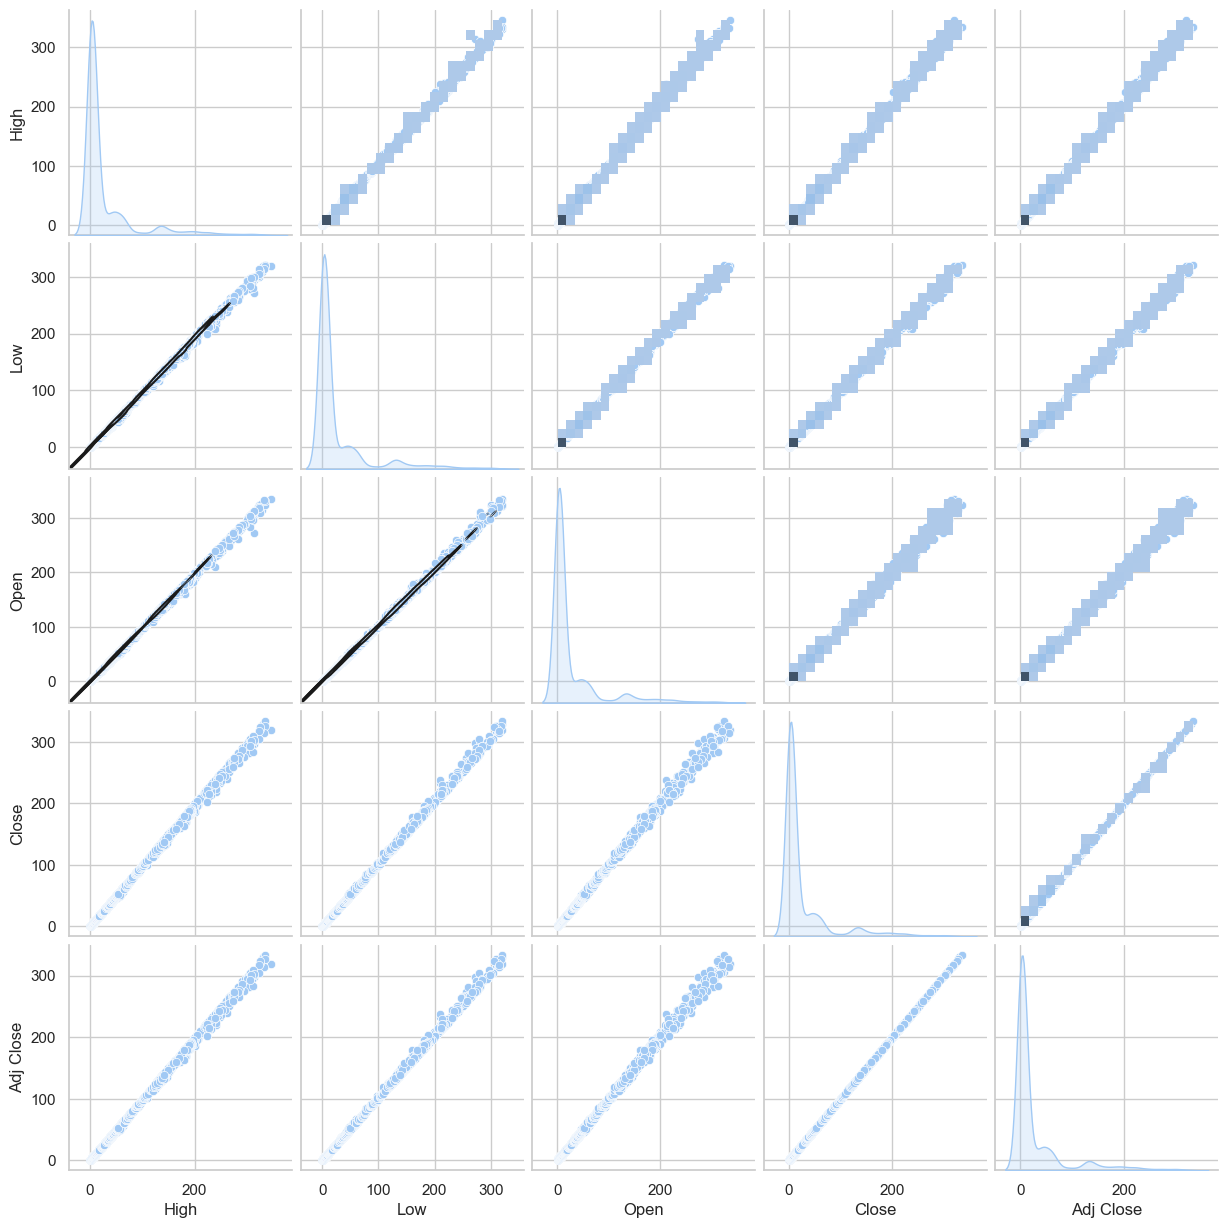

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity
import warnings

warnings.filterwarnings(action='ignore')

res = pd.read_csv('data/NVIDIA Corporation.csv', header=0, encoding='unicode_escape')
res = res.drop(columns=['Date', 'Volume'])

# seaborn histogram
# sns.distplot(res[['High', 'Low', 'Open', 'Close', 'Adj Close']], hist=True, kde=True,
#              bins=int(180/5))

# plt.xlabel('Values of variables')


In [ ]:
# Estimating the kernel density function KDE for MRV
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(res).reshape(-1, 1))

# Plotting the estimated PDF
x_d = np.linspace(0, 300, 1000)
log_dens = kde.score_samples(x_d[:, None])
plt.plot(x_d, np.exp(log_dens), '-')
plt.show()

In [ ]:
sns.set_theme(style='whitegrid', palette='pastel')

ax = sns.pairplot(res[['High', 'Low', 'Open', 'Close', 'Adj Close']], diag_kind='kde')
ax.map_upper(sns.histplot, bins=20)
ax.map_lower(sns.kdeplot, levels=5, color='.1')

plt.show()